## SARIMA Modelling
Next, we will apply SARIMA model on Stock Price of Apple.


*Disclaimer: All investment strategies and investments involve risk of loss.  Nothing in this assginment constitutes professional and/or financial advice.*

## Import nessasary library

In [1]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
#os.chdir('data')
#from colorsetup import colors, palette
#sns.set_palette(palette)

import warnings
warnings.simplefilter(action='ignore')
import fbprophet
import pmdarima as pm

## Data Creation

In [2]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'AAPL'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
stock_master = tickerData.history(period='1d', start='2021-1-1', end='2022-2-9')

#see your data
stock_master.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-02,174.527647,175.656214,173.109456,175.616257,84914300,0.00,0
2022-02-03,174.257984,176.015754,171.900986,172.679993,89418100,0.00,0
2022-02-04,171.679993,174.100006,170.679993,172.389999,82391400,0.22,0
2022-02-07,172.860001,173.949997,170.949997,171.660004,77251200,0.00,0
2022-02-08,171.729996,175.350006,171.429993,174.830002,74829200,0.00,0


In [3]:
def index_convert_close(input_df):
    "The function below converts the date index to dataframe, and replace the index with 1,2,3..."
    "PLUS remove all other date and left closing price only"
    didx = input_df.index
    date_df = didx.to_frame(index = False)
    close_list = input_df['Close'].tolist()
    close_df = pd.DataFrame(close_list,columns=['Close'])
    stock_close = pd.concat([date_df, close_df], axis=1, ignore_index=False)
    return stock_close

stock = index_convert_close(stock_master)
stock

,Date,Close
0,2020-12-31,131.709198
1,2021-01-04,128.453445
2,2021-01-05,130.041626
3,2021-01-06,125.664207
4,2021-01-07,129.952271
...,...,...
274,2022-02-02,175.616257
275,2022-02-03,172.679993
276,2022-02-04,172.389999
277,2022-02-07,171.660004


<AxesSubplot:>

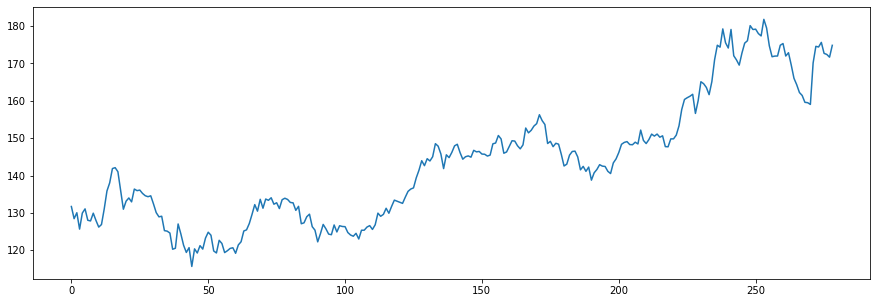

In [4]:
#quick plot of full time series
plt.figure(figsize = (15,5))
stock['Close'].plot()

## Explonatary Data Analysis

In [5]:
df_stock = stock['Close']
df_stock

0      131.709198
1      128.453445
2      130.041626
3      125.664207
4      129.952271
          ...    
274    175.616257
275    172.679993
276    172.389999
277    171.660004
278    174.830002
Name: Close, Length: 279, dtype: float64

#### Inspect Autocorrelation plots to get parameter p and q

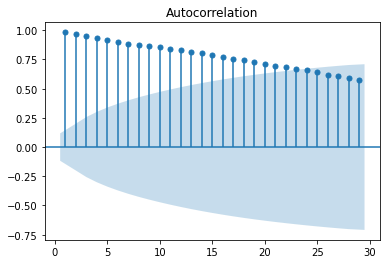

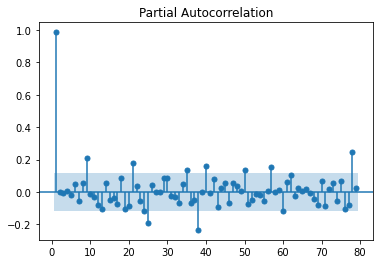

In [6]:
auto_correlation_plot = sm.tsa.graphics.plot_acf(df_stock, lags=range(1,30), alpha=0.05)
partial_auto_correlation_plot = sm.tsa.graphics.plot_pacf(df_stock, lags=range(1,80), alpha=0.05)

#### Check Differencing

Text(0.5, 1.0, 'second diff')

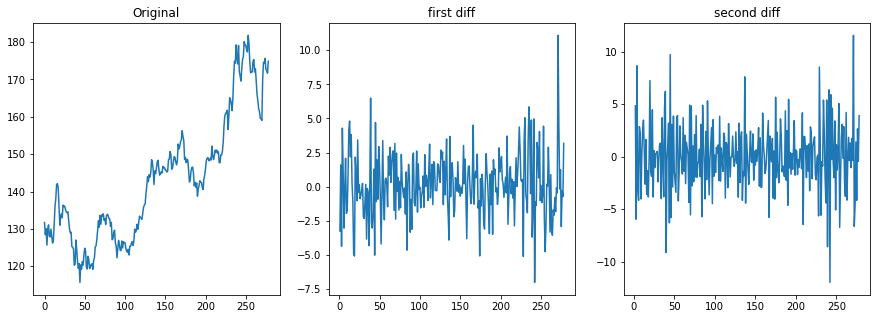

In [7]:
from matplotlib import pyplot as plt

fig,axes = plt.subplots(1,3,figsize = (15,5))
axes[0].plot(df_stock)
axes[0].set_title('Original')
axes[1].plot(df_stock.diff())
axes[1].set_title('first diff')
axes[2].plot(df_stock.diff().diff())
axes[2].set_title('second diff')

Looks like 1 step differencing is good enough

#### Lets fit the data

In [8]:
p = 22
d = 1
q = 0

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sar = sm.tsa.statespace.SARIMAX(stock.Close, 
                                order=(p,d,q), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                 Close   No. Observations:                  279
Model:             SARIMAX(22, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -600.243
Date:                               Mon, 07 Mar 2022   AIC                           1250.485
Time:                                       00:18:14   BIC                           1340.073
Sample:                                            0   HQIC                          1286.476
                                               - 279                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0303      0.036      0.850      0.395      -0.040       0.100
ar.L1         -0.0094      0.064     -0.147      0.883      -0.135       0.116
ar.L2         -0.0092      0.067     -0.136      0.891      -0.141       0.122
ar.L3         -0.0761      0.069     -1.106      0.269      -0.211       0.059
ar.L4          0.0056      0.066      0.086      0.932      -0.123       0.134
ar.L5          0.0043      0.070      0.061      0.951      -0.133       0.141
ar.L6          0.0242      0.063      0.384      0.701      -0.099       0.148
ar.L7          0.0206      0.065      0.318      0.750      -0.107       0.148
ar.L8          0.0093      0.067      0.140      0.889      -0.122       0.140
ar.L9          0.0237      0.072      0.331      0.741      -0.117       0.164
ar.L10         0.0294      0.072      0.407      0.684      -0.112       0.171
ar.L11         0.0624      0.069      0.910      0.363      -0.072       0.197
ar.L12         0.0663      0.097      0.686      0.492      -0.123       0.256
ar.L13        -0.0775      0.068     -1.144      0.253      -0.210       0.055
ar.L14         0.0351      0.074      0.474      0.636      -0.110       0.180
ar.L15         0.0534      0.074      0.724      0.469      -0.091       0.198
ar.L16         0.0977      0.076      1.293      0.196      -0.050       0.246
ar.L17        -0.1448      0.077     -1.874      0.061      -0.296       0.007
ar.L18        -0.0610      0.071     -0.856      0.392      -0.201       0.079
ar.L19        -0.0296      0.078     -0.378      0.705      -0.183       0.124
ar.L20        -0.2483      0.072     -3.426      0.001      -0.390      -0.106
ar.L21        -0.0703      0.073     -0.958      0.338      -0.214       0.073
ar.L22         0.0167      0.071      0.233      0.816      -0.123       0.157
ma.S.L12      -0.8448      0.087     -9.750      0.000      -1.015      -0.675
sigma2         5.0228      0.446     11.258      0.000       4.148       5.897
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                20.68
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.41
Prob(H) (two-sided):                  0.95   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

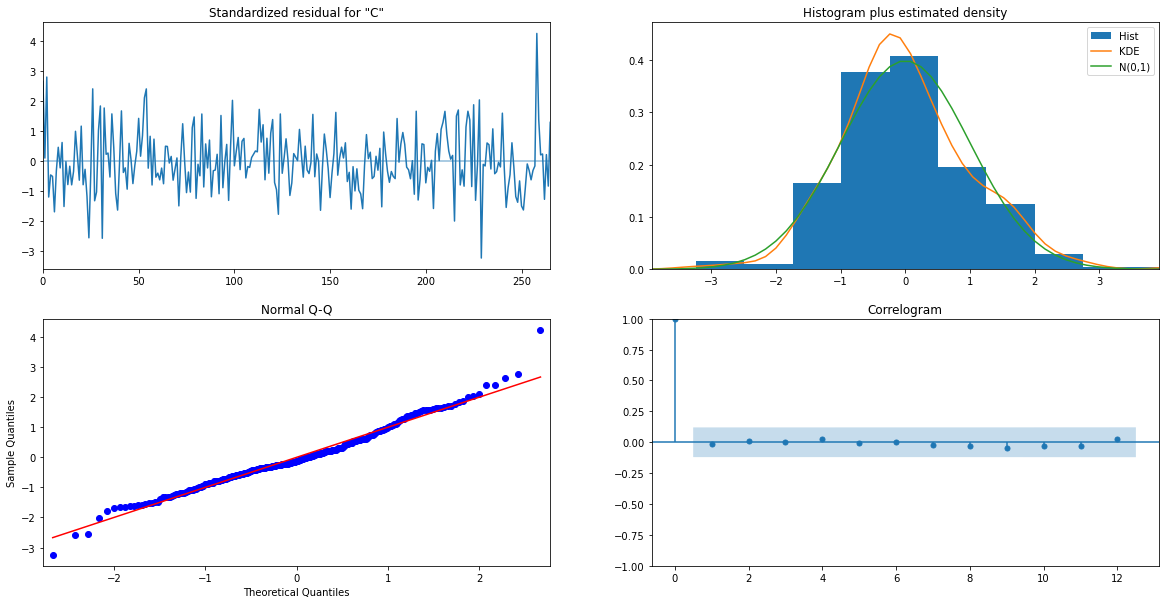

In [10]:
sar.plot_diagnostics(lags=12,figsize = (20,10),);

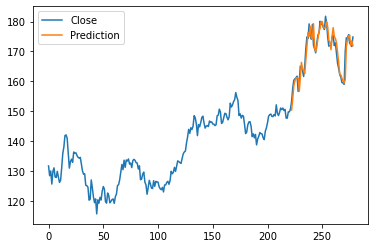

In [11]:
# plot predictions
pd.plotting.register_matplotlib_converters()

#use model.predict() start and end in relation to series
stock['Prediction'] = sar.predict(start = 222, end = 278)  
stock[['Close', 'Prediction']].plot();

Calculate the mean square error at the end

In [12]:
import math

list1 = []
for indexes in stock.index.tolist():
    X = (stock['Prediction'][indexes] - stock['Close'][indexes])**2
    list1.append(X)

list2 = [x for x in list1 if math.isnan(x) == False]

MSE = sum(list2)/len(list2)
MSE

7.49830322814275

Potential problem is that the seasonal component is hard to determine. Commonsense tell us that stock price movement have seasonality. But in real life, the seasonality can be hard to determine. 

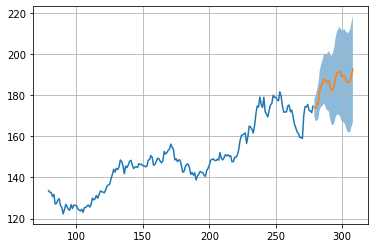

In [13]:
# can use get forecast to create a forecast object
future_fcst = sar.get_forecast(30)
# That will have a method to pull in confidence interval 
confidence_int = future_fcst.conf_int(alpha = 0.05)
# Has an attribute to pull in predicted mean
fcst = future_fcst.predicted_mean
# Plot predictions and confidence intervals 
#(showing confidence intervals can let you know how likely the future value will fall, since there is no 100% accurate prediction)
plt.plot(stock.Close[-200:])
plt.plot(fcst)
plt.fill_between(confidence_int.index,confidence_int['lower Close'],confidence_int['upper Close'],alpha = 0.5)
plt.grid()